In [2]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def parse_node(s):
    x,y = s.split('\t')[:2]
    x,y = tuple(_x.replace('"','') for _x in json.loads(x)), json.loads(y)
    return x,y

with open('industry_map_reduce.txt', 'r') as graph_file:
    edges = [parse_node(line) for line in graph_file.readlines()]

edges[:10]

[(('airlines/aviation', 'health'), 23),
 (('airlines/aviation', 'leisure'), 260),
 (('airlines/aviation', 'airlines/aviation'), 1149),
 (('airlines/aviation', 'alternative dispute resolution'), 2),
 (('airlines/aviation', 'alternative medicine'), 1),
 (('airlines/aviation', 'apparel & fashion'), 5),
 (('airlines/aviation', 'architecture & planning'), 14),
 (('airlines/aviation', 'arts and crafts'), 1),
 (('airlines/aviation', 'aviation & aerospace'), 545),
 (('airlines/aviation', 'broadcast media'), 10)]

In [4]:
graph = nx.Graph()

for edge in edges:
    graph.add_edge(edge[0][0], edge[0][1], weight=edge[1])

graph.nodes

NodeView(('airlines/aviation', 'health', 'leisure', 'alternative dispute resolution', 'alternative medicine', 'apparel & fashion', 'architecture & planning', 'arts and crafts', 'aviation & aerospace', 'broadcast media', 'building materials', 'business supplies and equipment', 'capital markets', 'civic & social organization', 'civil engineering', 'commercial real estate', 'computer games', 'computer hardware', 'computer networking', 'computer software', 'consumer electronics', 'consumer goods', 'consumer services', 'defense & space', 'e-learning', 'education management', 'electrical/electronic manufacturing', 'environmental services', 'events services', 'executive office', 'facilities services', 'financial services', 'fine art', 'food & beverages', 'food production', 'fund-raising', 'government administration', 'government relations', 'graphic design', 'higher education', 'hospital & health care', 'human resources', 'import and export', 'individual & family services', 'industrial automa

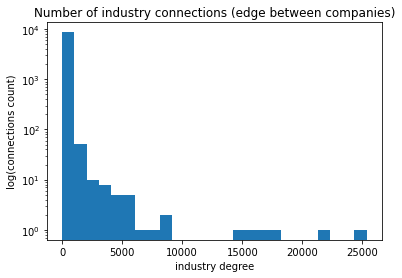

In [66]:
weights = np.array([e[1] for e in edges])
plt.figure()
plt.title('Number of industry connections (edge between companies)')
plt.ylabel('log(connections count)')
plt.xlabel('industry degree')
plt.hist(weights, bins=25)
plt.yscale('log')
plt.show()

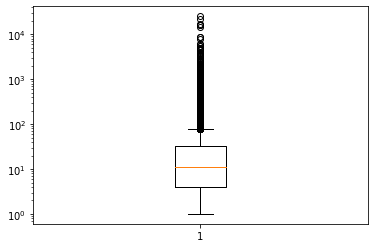

In [58]:
plt.boxplot(weights, )
plt.yscale('log')
plt.show()

In [6]:
num_connected_components = len(list(nx.connected_components(graph)))
print('Number of connected components:', num_connected_components)

num_nodes = graph.number_of_nodes()
print('Number of nodes:', num_nodes)

num_edges = graph.number_of_edges()
print('Number of edges:', num_edges)

mean_degree = np.mean([d for n,d in graph.degree()])
print('Mean node degree:', mean_degree)

Number of connected components: 1
Number of nodes: 100
Number of edges: 4744
Mean node degree: 94.88


In [10]:
graph['health']

AtlasView({'airlines/aviation': {'weight': 23}, 'alternative dispute resolution': {'weight': 5}, 'alternative medicine': {'weight': 745}, 'apparel & fashion': {'weight': 215}, 'architecture & planning': {'weight': 83}, 'arts and crafts': {'weight': 60}, 'aviation & aerospace': {'weight': 19}, 'broadcast media': {'weight': 42}, 'building materials': {'weight': 43}, 'business supplies and equipment': {'weight': 44}, 'capital markets': {'weight': 8}, 'civic & social organization': {'weight': 178}, 'civil engineering': {'weight': 17}, 'commercial real estate': {'weight': 20}, 'computer & network security': {'weight': 22}, 'computer games': {'weight': 24}, 'computer hardware': {'weight': 19}, 'computer networking': {'weight': 11}, 'computer software': {'weight': 386}, 'consumer electronics': {'weight': 76}, 'oil & energy': {'weight': 68}, 'online media': {'weight': 82}, 'outsourcing/offshoring': {'weight': 10}, 'package/freight delivery': {'weight': 4}, 'packaging and containers': {'weight'

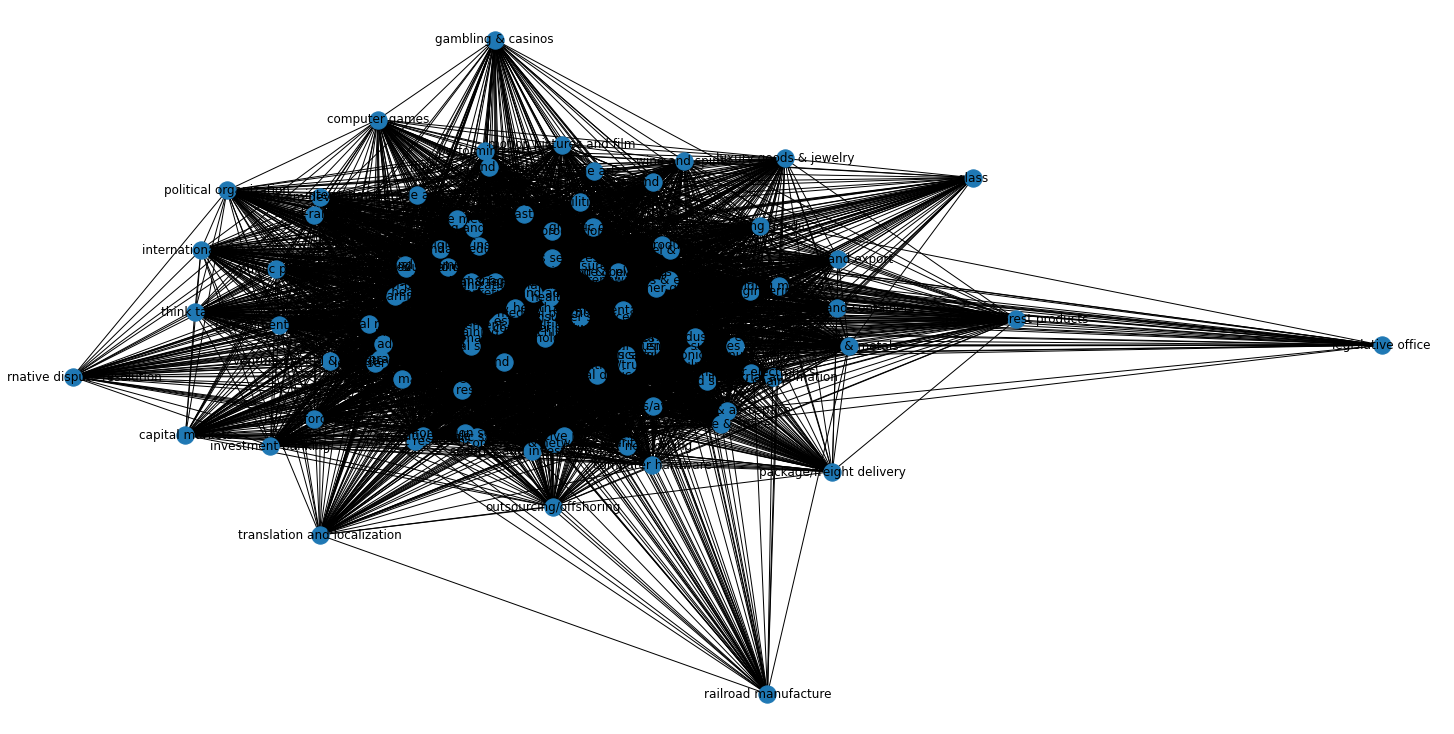

In [68]:
plt.figure(figsize=(20,10))
nx.draw(graph, with_labels=True, )
plt.savefig('industry_map.png')

Filtering the edges, use only edges greater than Q1

In [73]:
weights_q1 = np.quantile(weights, 0.25)
weights_q1

4.0